# Scikit-Learn
https://scikit-learn.org   

Module implémentant la plupart des algorithmes d'apprentissage statistique supervisé ou non supervisé, excepté le deep-learning.  
Plus un ensemble d'utilitaires pour faire des modèles :  
- preparation des données (ex.> normalisation)
- validation croisée (cross validation)  
- évaluation des modèles
- et bien plus...

## Un exemple de classification binaire avec un jeu de données synthétique

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

#### Créons un jeu de données synthétiques
50 exemples de dimension 2 et appartenant à deux classes 0 et 1

In [107]:
from sklearn.datasets.samples_generator import make_blobs

In [123]:
X, y = make_blobs(n_samples=100, centers=[[-1, -1], [1, 1]],
                  random_state=0, cluster_std=0.5)

In [124]:
X.shape

(100, 2)

In [125]:
# 10 exemples 
X[:10]

array([[-0.92252629, -0.81091874],
       [ 0.6781908 , -0.11170158],
       [-0.96674139, -0.84876405],
       [ 0.44780833,  1.02608254],
       [ 0.77223375,  1.00873958],
       [-0.23361039, -0.26532062],
       [-0.91128693, -1.20089047],
       [ 0.68207696,  1.33821665],
       [-0.41061021, -1.08996242],
       [-1.8531351 , -0.0246123 ]])

In [126]:
# leurs classes respectives
print(y[:10])

[0 1 0 1 1 0 0 1 0 0]


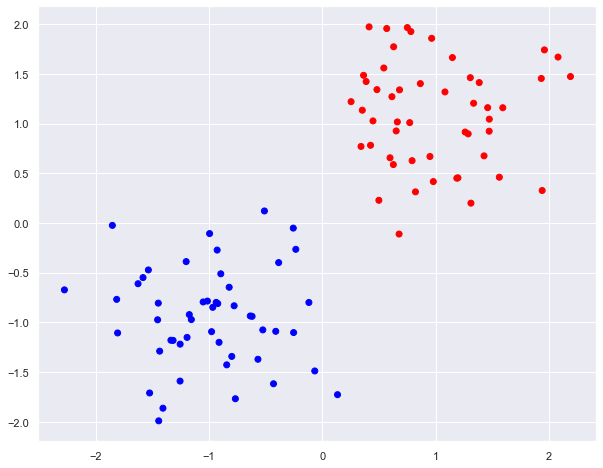

In [127]:
fig = plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')

#### Apprentissage d'un classifieur binaire
On choisi une SVM

In [128]:
# import de la famille de modèle
from sklearn.svm import SVC 

In [144]:
# on définit une instance du modèle avec des paramètres
clf1 = SVC(kernel='linear', C=1000)

In [145]:
# on entraîne le modèle (apprentissage)
clf1.fit(X, y)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [146]:
# On peut prédire sur de nouvelles données
print(clf1.predict( [(2.5, 5)] ))
print(clf1.predict( [(0.5, 0)] ))

[1]
[1]


In [147]:
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([[xi, yj]])  # quirk about 1d arrays...
    return ax.contour(X, Y, P, colors='k',
                      levels=[-1, 0, 1], alpha=0.5,
                      linestyles=['--', '-', '--'])

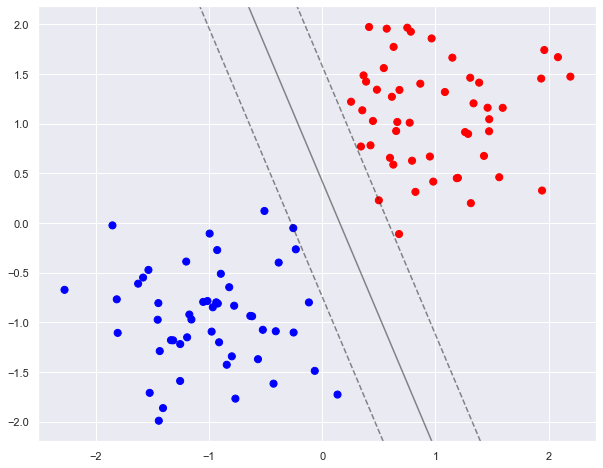

In [148]:
fig = plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')
plot_svc_decision_function(clf1);

Mais pour faire un bon modèle il trouver les hyper-paramètres optimaux, et pouvoir comparer les performances de plusieurs types de modèles.  

- diviser le jeu de données training et testing sets (80%-20% ?)   
`sklearn.model_selection.train_test_split`
- normaliser les données   
`sklearn.preprocessing.normalize`
- Entraîner sur les données d'entraînement en faisant de la validation croisée pour estimer les meilleurs hyper-paramètres   
`sklearn.model_selection.cross_validate`
- évaluation sur le test set  
`sklearn.metrics`